# Heterozygosity Groupings

## V0.1.x

WARNING: this version is using v0.1.x data for which all callsets are much smaller than in later versions suggesting there is some kind of truncation

In [1]:
cd /nbi/group-data/ifs/JIC/Research-Groups/Diane-Saunders/FP_project/FP_pipeline/data/0.1/Callset/callsets/

/nbi/Research-Groups/JIC/Diane-Saunders/FP_project/FP_pipeline/data/0.1/Callset/callsets


In [2]:
import vcfnp
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
import allel
import seaborn as sns
import pandas as pd
import dask.array as da
from dask.diagnostics import ProgressBar,  Profiler, ResourceProfiler, CacheProfiler, visualize
from bokeh.io import output_notebook

import qgrid
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folder

output_notebook()
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
sns.set_style('white')

Loading BokehJS ...

In [3]:
years = ['2013', '2014', '2015']

callset = h5py.File('2013/2013_SNPs.hd5', mode='r')
samples_2013 = list(callset['samples'])
genotypes_2013 = allel.GenotypeChunkedArray(callset['calldata']['genotype'])
variants_2013 = allel.VariantChunkedTable(callset['variants'])

callset = h5py.File('2014/2014_SNPs.hd5', mode='r')
samples_2014 = list(callset['samples'])
genotypes_2014 = allel.GenotypeChunkedArray(callset['calldata']['genotype'])
variants_2014 = allel.VariantChunkedTable(callset['variants'])

callset = h5py.File('2015/2015_SNPs.hd5', mode='r')
samples_2015 = list(callset['samples'])
genotypes_2015 = allel.GenotypeChunkedArray(callset['calldata']['genotype'])
variants_2015 = allel.VariantChunkedTable(callset['variants'])

samples = {'2013': samples_2013, '2014': samples_2014, '2015': samples_2015}
genotypes = {'2013': genotypes_2013, '2014': genotypes_2014, '2015': genotypes_2015}
variants = {'2013': variants_2013, '2014': variants_2014, '2015': variants_2015}

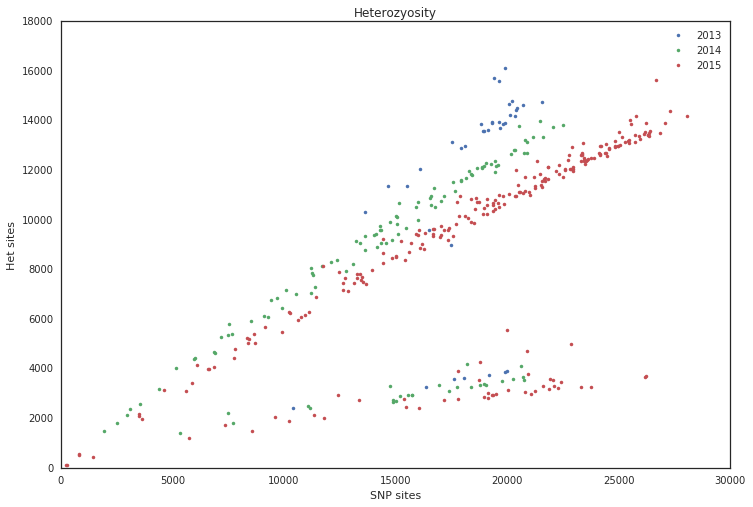

In [4]:
heterozygosity = {}
for year in years:
    called = genotypes[year].is_called().sum(axis=0)
    het = genotypes[year].is_het().sum(axis=0)
    plt.plot(called, het, '.', label=year)
    heterozygosity[year] = het/called

heterozygosity = pd.DataFrame(np.transpose([np.hstack([samples[y] for y in years]),
                                            np.hstack([heterozygosity[y] for y in years]),
                                            np.hstack([[y]*len(samples[y]) for y in years])]), 
                          columns=['sample', 'heterozygosity', 'year'])
heterozygosity['heterozygosity'].astype(np.float, inplace=True)

plt.legend()
plt.title("Heterozyosity")
plt.xlabel("SNP sites")
plt.ylabel("Het sites")

In [5]:
%load_ext rpy2.ipython

In [6]:
%R require(ggplot2)

/usr/users/ga004/buntingd/FP_dev/dev/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [7]:
%%R -i heterozygosity
library(ggtree)

setwd("/nbi/group-data/ifs/JIC/Research-Groups/Diane-Saunders/FP_project/FP_pipeline/data")
groups13 <- data.frame(lib=c('LIB4746','LIB4362', 'LIB4456', 'LIB4458', 'LIB4460', 'LIB4463', 'LIB4465', 'LIB4470', 'LIB4471', 'LIB4472', 'LIB4473', 'LIB4475', 'LIB4477', 'LIB4478', 'LIB4479', 'LIB4481', 'LIB4482', 'LIB4361', 'LIB4459', 'LIB4468', 'LIB4474', 'LIB4476', 'LIB4480', 'LIB5295', 'LIB4483', 'LIB5291', 'LIB5292', 'LIB5293', 'LIB4360', 'LIB4457', 'LIB4462', 'LIB4466', 'LIB4467', 'LIB4745', 'LIB4747', 'LIB4748', 'LIB5294', 'LIBOakley', 'LIBTorch'),
group=c('4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','3','3','3','3','3','3','3','2','2','2','2','1','1','1','1','1','1','1','1','1','1','1'))

groups14<-data.frame(lib=c('LIB10868','LIB10869','LIB10875','LIB10876','LIB10878','LIB10880','LIB10890','LIB12419','LIB12420','LIB12424','LIB12425','LIB12429','LIB12445','LIB12446','LIB12451','LIB12452','LIB12453','LIB12454','LIB12497','LIB12500','LIB14875','LIB14876','LIB14887','LIB10877','LIB12458','LIB14892','LIB10871','LIB10872','LIB10873','LIB10874','LIB10879','LIB10881','LIB10882','LIB10883','LIB10884','LIB10885','LIB10886','LIB10887','LIB10888','LIB10892','LIB10894','LIB10898','LIB10899','LIB10900','LIB10903','LIB10904','LIB12432','LIB12434','LIB12438','LIB12439','LIB12440','LIB12441','LIB12442','LIB12443','LIB12444','LIB12447','LIB12448','LIB12449','LIB12450','LIB12455','LIB12456','LIB12459','LIB12460','LIB12461','LIB12468','LIB12472','LIB12473','LIB12475','LIB12477','LIB12478','LIB12480','LIB12484','LIB12486','LIB12489','LIB12490','LIB12493','LIB12494','LIB12495','LIB12496','LIB12501','LIB12502','LIB12503','LIB12505','LIB12506','LIB12507','LIB14054','LIB14061','LIB14070','LIB14075','LIB14077','LIB14873','LIB14877','LIB14878','LIB14879','LIB14880','LIB14881','LIB14882','LIB14883','LIB14888','LIB14889','LIB14894','LIB10896','LIB10897','LIB10901','LIB12462','LIB12474','LIB12488','LIB12499','LIB14895','LIB10889','LIB10891','LIB10893','LIB12422','LIB12431','LIB14655','LIB14656','LIB14657','LIB14658','LIB14659'),
group=c('1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4','4_1','4_1','4_1','4_1','4_1','4_1','4_1','4_1','5_1','5_1','Mixed','Mixed','Mixed','??','??','??','??','??'))

groups15<-data.frame(lib=c('LIB18235','LIB18236','LIB18237','LIB18238','LIB18245','LIB18246','LIB18247','LIB18250','LIB18251','LIB18253','LIB18254','LIB18255','LIB18256','LIB18258','LIB18259','LIB18260','LIB18261','LIB18569','LIB18570','LIB18571','LIB18572','LIB18573','LIB18574','LIB18575','LIB18576','LIB18577','LIB18578','LIB18579','LIB18580','LIB18592','LIB18593','LIB18594','LIB18595','LIB18596','LIB18597','LIB18598','LIB18599','LIB18600','LIB18602','LIB18603','LIB18605','LIB18677','LIB18678','LIB18679','LIB18680','LIB18681','LIB18682','LIB18683','LIB18685','LIB18686','LIB18687','LIB18688','LIB18692','LIB18693','LIB18694','LIB18695','LIB18696','LIB18698','LIB18747','LIB18748','LIB18749','LIB18750','LIB18751','LIB18752','LIB18753','LIB18846','LIB18847','LIB18848','LIB18849','LIB18850','LIB18851','LIB18852','LIB18853','LIB18854','LIB18856','LIB18857','LIB18858','LIB18859','LIB18860','LIB18861','LIB18862','LIB18863','LIB18864','LIB18865','LIB18866','LIB18880','LIB18881','LIB18882','LIB19010','LIB19011','LIB19012','LIB19013','LIB19014','LIB19015','LIB19016','LIB19017','LIB19018','LIB19019','LIB19020','LIB19021','LIB19022','LIB19023','LIB19024','LIB19025','LIB19026','LIB19028','LIB19029','LIB19030','LIB19032','LIB19033','LIB19036','LIB19037','LIB19038','LIB19039','LIB19040','LIB19041','LIB19042','LIB19043','LIB19044','LIB19310','LIB19311','LIB19312','LIB19313','LIB19314','LIB19315','LIB19316','LIB19317','LIB19318','LIB19319','LIB19320','LIB19321','LIB19322','LIB19323','LIB19324','LIB19325','LIB19326','LIB19327','LIB19328','LIB19329','LIB19330','LIB19331','LIB19332','LIB19333','LIB19334','LIB19335','LIB19336','LIB19337','LIB19338','LIB19339','LIB19340','LIB19341','LIB19522','LIB19523','LIB19524','LIB19525','LIB19527','LIB19528','LIB19529','LIB19530','LIB19531','LIB19532','LIB19533','LIB19534','LIB19535','LIB19536','LIB19538','LIB19540','LIB19541','LIB19542','LIB19840','LIB19841','LIB19842','LIB19843','LIB19846','LIB19847','LIB19848','LIB19849','LIB19850','LIB19851','LIB19852','LIB19854','LIB19855','LIB19856','LIB19857','LIB19858','LIB19859','LIB19860','LIB19861','LIB19862','LIB19863','LIB19864','LIB19865','LIB19866','LIB19867','LIB19868','LIB19869','LIB19870','LIB19987','LIB19988','LIB19990','LIB19992','LIB19993','LIB19994','LIB19995','LIB19996','LIB19997','LIB19998','LIB19999','LIB20000','LIB20001','LIB20002','LIB20003','LIB20004','LIB20005','LIB20006','LIB20007','LIB20008','LIB20009','LIB20010','LIB20011','LIB20012','LIB20013','LIB20212','LIB20213','LIB20214','LIB20215','LIB20216','LIB20217','LIB20218','LIB20220','LIB20226','LIB20227'),
group=c('4_6','4_6','4_6','4_6','3','3','3','4','1','4_6','4_6','4','4_6','4_6','4_6','1','4_6','4','4_1','4','4_6','4_6','4_6','4_6','?','1','4','4_6','4','4','4_6','4_6','4_6','?','4_6','?','4','4_6','4','4','4','4_6','4_1','4_6','4_6','4','4_6','4_6','1','4_6','4_6','4','1','1','1','4_6','4','4','3','4_6','1','1','4_6','1','1','4','4_6','1','4_6','4','1','4_6','4_6','4','1','4_1','1','1','4_6','4_6','4_1','1','4','4','4_6','4','4','4','4_1','3','4_6','4_6','4_6','1','1','1','4_6','4_6','4','4_6','4_6','4_6','4_1','4_6','1','4_6','4_6','4_6','1','1','2','2','2','2','4_6','4_6','4','4_6','4','4_6','?','4_6','4','4_6','4_6','4_6','4_1','4_1','4_1','4_1','4_1','4_6','1','4_6','1','4','4_1','4','4','4_6','4_6','4_6','?','?','4_1','4_1','5_1','4_1','4_1','4_1','4_1','4_1','4','4','4','4_6','4','4_1','4_1','4_1','4_1','4_1','4','4_6','3','4','3','4_6','1','4_6','4','4','4','4_6','4_6','1','1','1','4_6','4_1','4_1','5_1','4','4_1','4','4','4_1','4','4','4_1','4','4','4','1','1','4_6','4','1','4_6','4','4','4_6','4_6','4_1','4_6','3','4_6','4_6','4','3','3','4','3','5_1','5_1','5_1','4','4','4','4','4','4','4_1','4','4','4','4','3','4_6','4','4_1','4'))

groups<-rbind(groups13, groups14, groups15)


/usr/users/ga004/buntingd/FP_dev/dev/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ggtree v1.6.11  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

  warnings.warn(x, RRuntimeWarning)


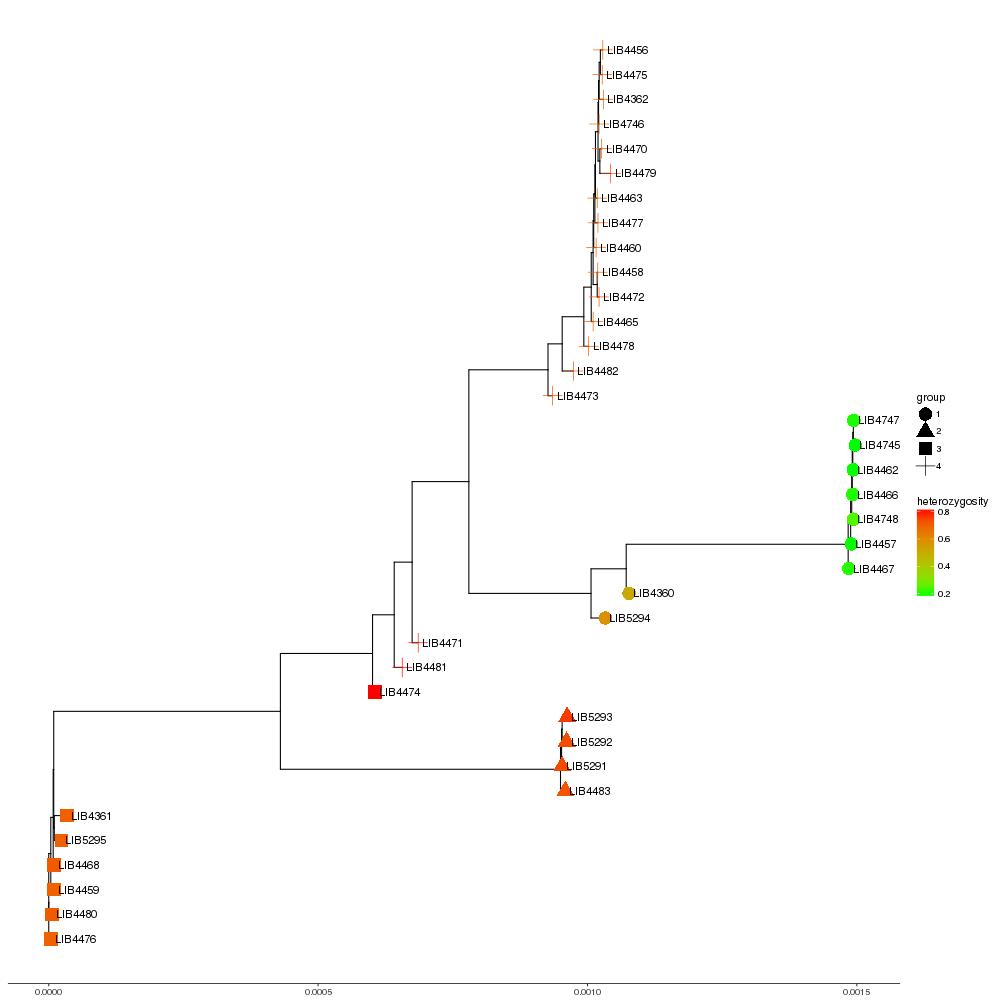

In [8]:
%%R -w1000 -h1000 -o svg
heterozygosity$heterozygosity <- as.numeric(as.character(heterozygosity$heterozygosity))
groups$group <- as.factor(groups$group)

raxml1 <- read.raxml("0.1/Tree/2013/comb/RAxML_bipartitionsBranchLabels.2013")
p <- ggtree(raxml1, layout="rectangular") 
p<- p %<+% heterozygosity 
p <- p + geom_tippoint(aes(color=heterozygosity, shape=group), size=6) 
p <- p + scale_colour_gradient(low='green', high='red') + theme_tree2(legend.position='right')
p<- p %<+% groups + geom_tiplab(size=4) 
p

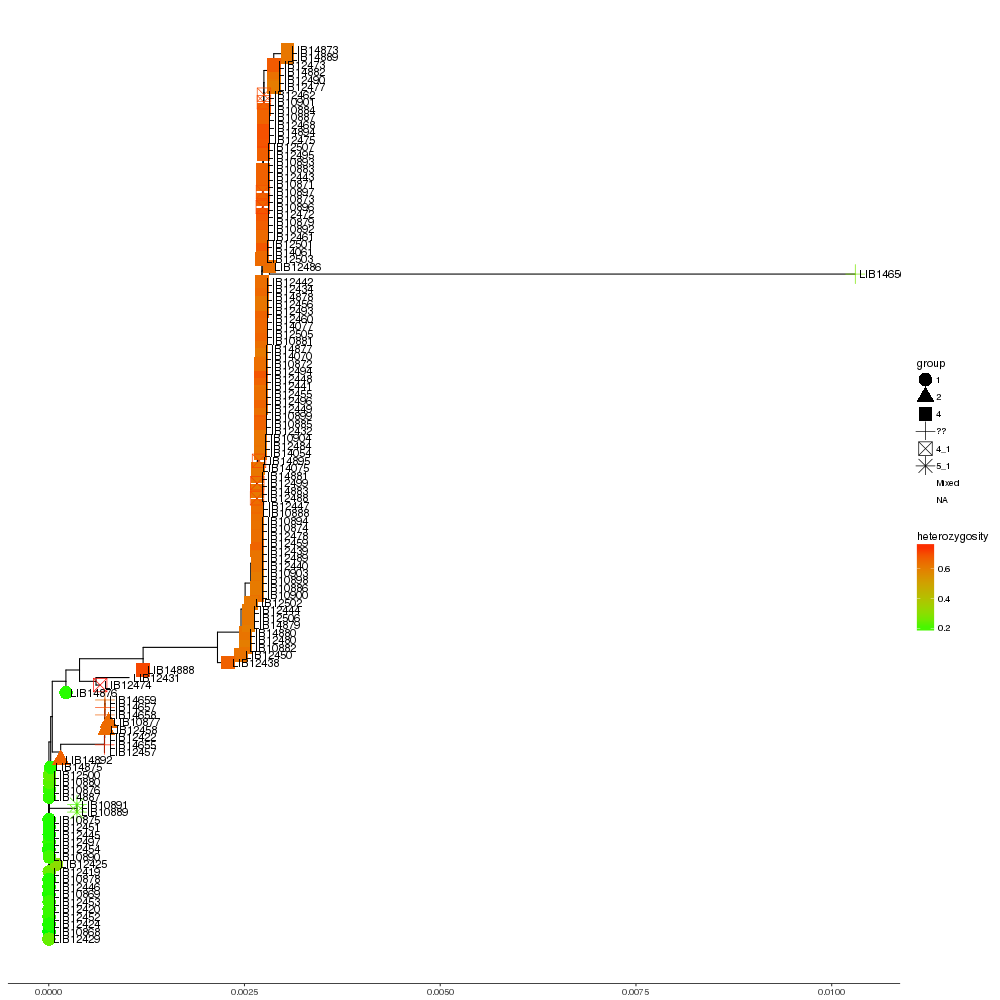

In [9]:
%%R -w1000 -h1000 -o svg
heterozygosity$heterozygosity <- as.numeric(as.character(heterozygosity$heterozygosity))
groups$group <- as.factor(groups$group)

raxml1 <- read.raxml("0.1/Tree/2014/comb/RAxML_bipartitionsBranchLabels.2014")
p <- ggtree(raxml1, layout="rectangular") 
p<- p %<+% heterozygosity 
p <- p + geom_tippoint(aes(color=heterozygosity, shape=group), size=6) 
p <- p + scale_colour_gradient(low='green', high='red') + theme_tree2(legend.position='right')
p<- p %<+% groups + geom_tiplab(size=4) 
p

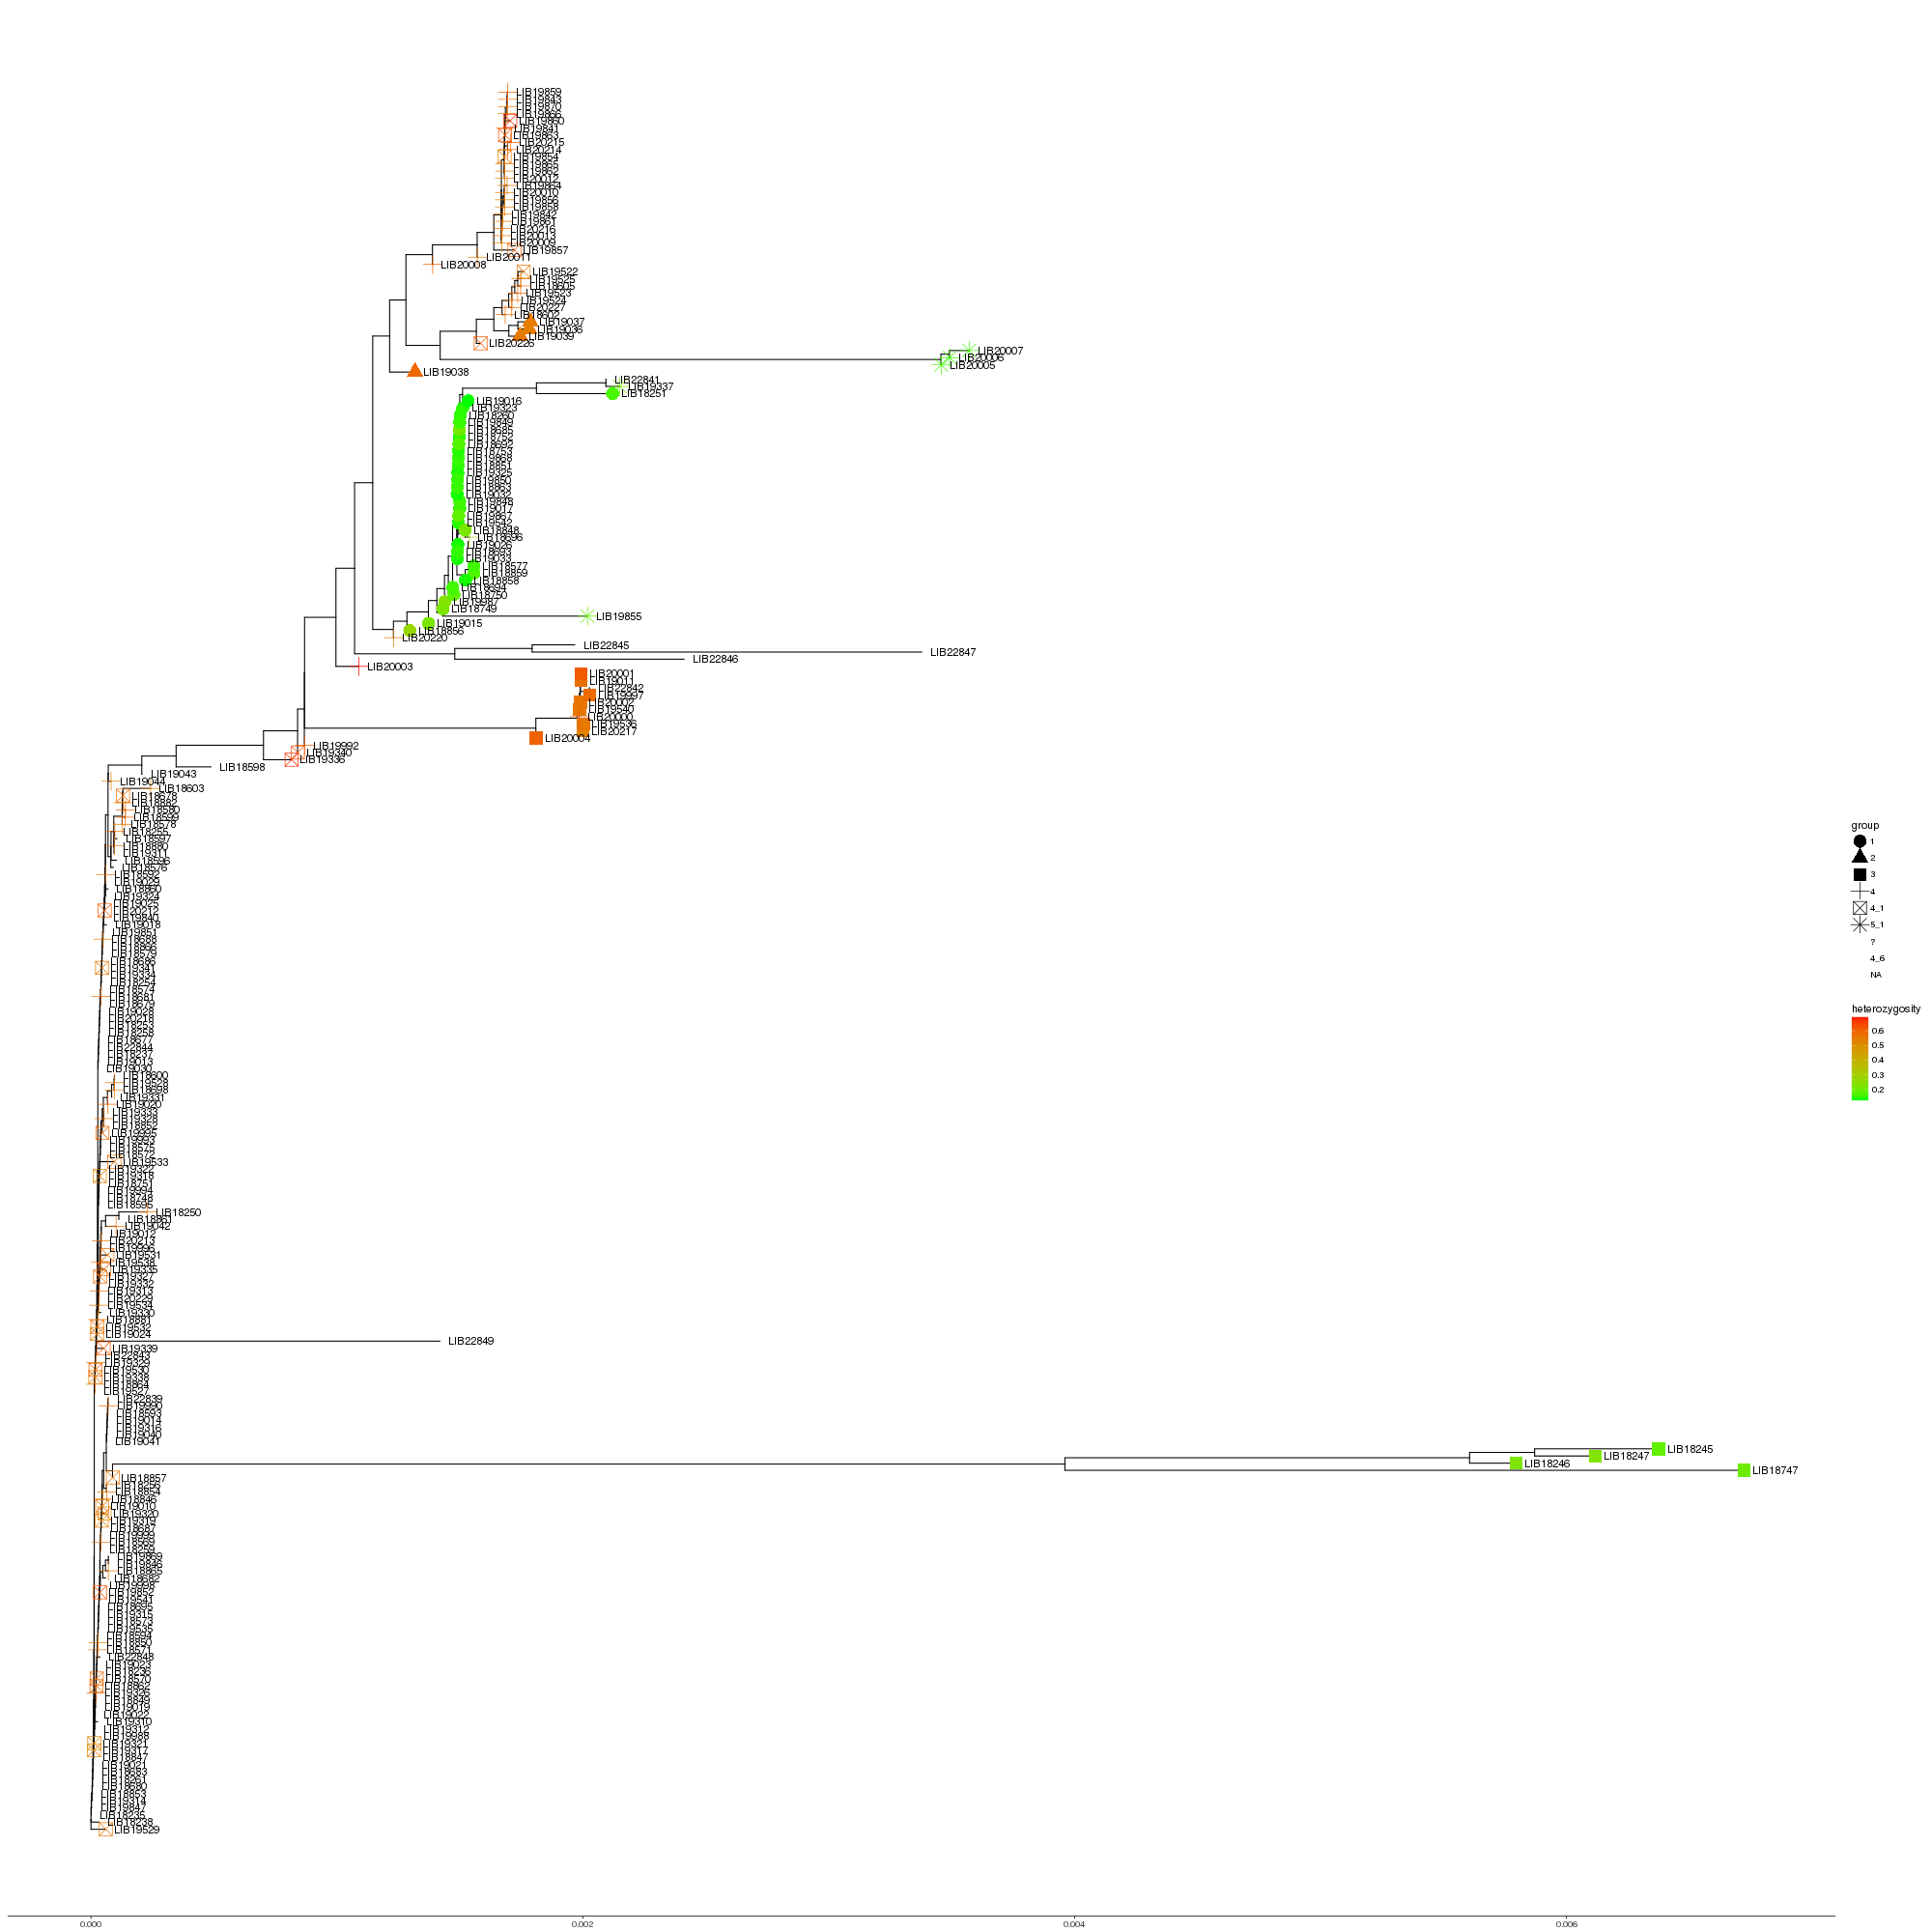

In [10]:
%%R -w2000 -h2000
heterozygosity$heterozygosity <- as.numeric(as.character(heterozygosity$heterozygosity))
groups$group <- as.factor(groups$group)

raxml1 <- read.raxml("0.1/Tree/2015/comb/RAxML_bipartitionsBranchLabels.2015")
p <- ggtree(raxml1, layout="rectangular") 
p<- p %<+% heterozygosity 
p <- p + geom_tippoint(aes(color=heterozygosity, shape=group), size=6) 
p <- p + scale_colour_gradient(low='green', high='red') + theme_tree2(legend.position='right')
p<- p %<+% groups + geom_tiplab(size=4) 
p